In [1]:
import sys

In [2]:
sys.path

['/Users/rpghosh/python-examples/webscraping/weathermap',
 '/Users/rpghosh/Desktop/anaconda3/lib/python38.zip',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/lib-dynload',
 '',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages/aeosa',
 '/Users/rpghosh/Desktop/anaconda3/lib/python3.8/site-packages/IPython/extensions',
 '/Users/rpghosh/.ipython']

In [3]:
sys.path.append('/Users/rpghosh/opt/anaconda3/lib/python3.8/site-packages')

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('/Users/rpghosh/python-examples/webscraping/heart.csv')

In [6]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
# check if there are any nulls
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [9]:
df.target.unique()

array([1, 0])

In [17]:
df.sex.nunique()

2

In [18]:
df.sex.unique()

array([1, 0])

In [10]:
import seaborn as sns

<AxesSubplot:xlabel='target', ylabel='count'>

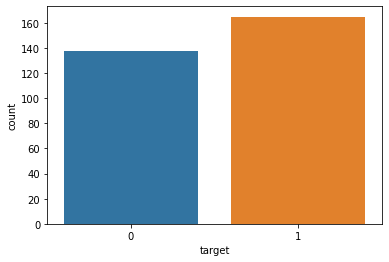

In [14]:
# Lets see the distribution across target value
sns.countplot(x=df.target)

In [15]:
len(df)

303

In [21]:
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='age', ylabel='count'>

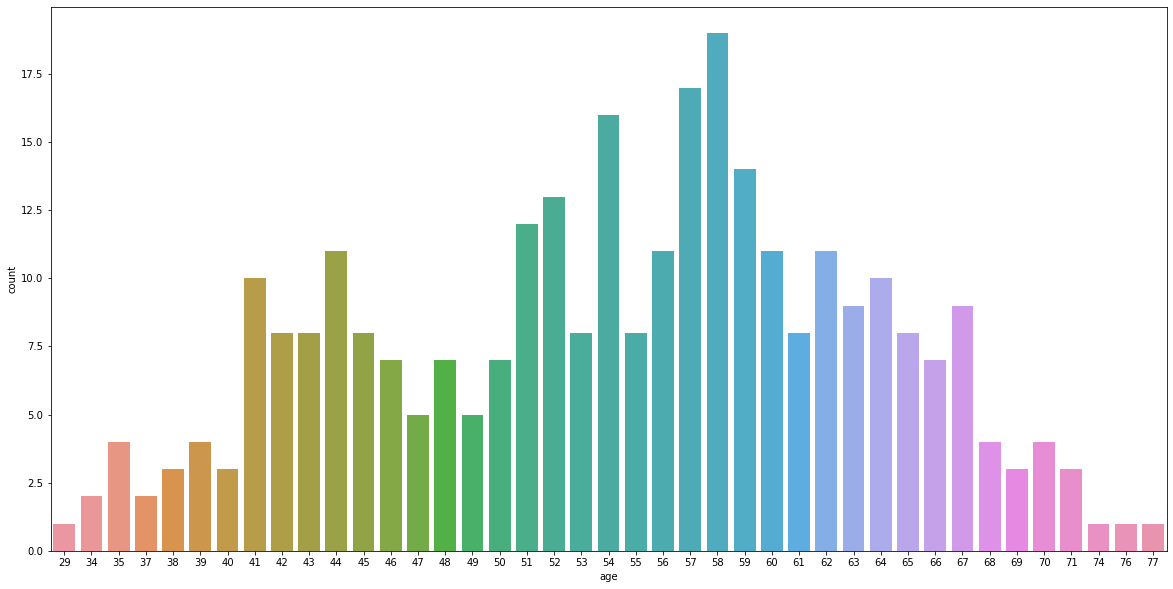

In [24]:
# Lets see the distribution across age
plt.figure(figsize=(20,10))
sns.countplot(x=df.age)

In [32]:
# gives an idea about the ages of people in the test data
df[(df.target == 1)]['age'].describe()

count    165.000000
mean      52.496970
std        9.550651
min       29.000000
25%       44.000000
50%       52.000000
75%       59.000000
max       76.000000
Name: age, dtype: float64

In [33]:
df[(df.target == 0)]['age'].describe()

count    138.000000
mean      56.601449
std        7.962082
min       35.000000
25%       52.000000
50%       58.000000
75%       62.000000
max       77.000000
Name: age, dtype: float64

In [ ]:
# Lets see the distrbution across gender / sex

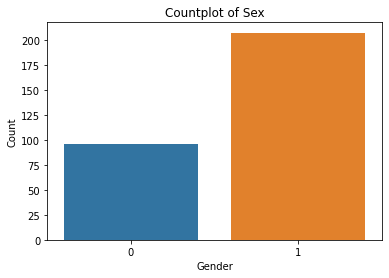

In [37]:
# Seems skewed in towards one of the genders
plt.title('Countplot of Sex')
sns.countplot(x=df.sex)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


In [40]:
X = df.iloc[: , :-1].values

In [41]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]])

In [43]:
y = df.iloc[ :, -1].values

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
scale = StandardScaler()

In [46]:
X = scale.fit_transform(X)

In [47]:
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
from sklearn.model_selection import LeaveOneOut

In [50]:
l = LeaveOneOut()

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
from sklearn.metrics import confusion_matrix, r2_score, accuracy_score, mean_squared_error

In [54]:
from math import sqrt

In [59]:
rmse = []
for K in range(1,21):
    actual = []
    predicted = []
    for train_index, test_index in l.split(X):
        
        X_train, X_test = X[train_index], X[test_index]
        
        y_train, y_test = y[train_index], y[test_index]
        
        model = KNeighborsClassifier(K)
        
        model.fit(X_train, y_train)
        
        y_predicted = model.predict(X_test)
        
        predicted.append(y_predicted[0])
        actual.append(y_test[0])
        
    rmse.append({'K':K , 'RMSE': sqrt(mean_squared_error( actual, predicted))})
        
    

In [60]:
rmse

[{'K': 1, 'RMSE': 0.49084019029541676},
 {'K': 2, 'RMSE': 0.49084019029541676},
 {'K': 3, 'RMSE': 0.429905201001552},
 {'K': 4, 'RMSE': 0.41026434366535963},
 {'K': 5, 'RMSE': 0.43751473336813634},
 {'K': 6, 'RMSE': 0.41026434366535963},
 {'K': 7, 'RMSE': 0.4142670174128899},
 {'K': 8, 'RMSE': 0.429905201001552},
 {'K': 9, 'RMSE': 0.40622223185119377},
 {'K': 10, 'RMSE': 0.41026434366535963},
 {'K': 11, 'RMSE': 0.41026434366535963},
 {'K': 12, 'RMSE': 0.4221585268381751},
 {'K': 13, 'RMSE': 0.4142670174128899},
 {'K': 14, 'RMSE': 0.41026434366535963},
 {'K': 15, 'RMSE': 0.4021394927349982},
 {'K': 16, 'RMSE': 0.4021394927349982},
 {'K': 17, 'RMSE': 0.39801487608399566},
 {'K': 18, 'RMSE': 0.41026434366535963},
 {'K': 19, 'RMSE': 0.41026434366535963},
 {'K': 20, 'RMSE': 0.4142670174128899}]

In [63]:
elbow_curve = pd.DataFrame([ item['RMSE'] for item in rmse ])

<AxesSubplot:>

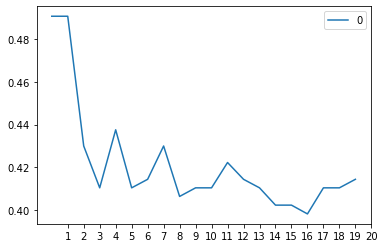

In [64]:
elbow_curve.plot(xticks = [i for i in range(1,21)])

In [65]:
rmse.sort(key = lambda x : x['RMSE'], reverse=True)

In [66]:
rmse

[{'K': 1, 'RMSE': 0.49084019029541676},
 {'K': 2, 'RMSE': 0.49084019029541676},
 {'K': 5, 'RMSE': 0.43751473336813634},
 {'K': 3, 'RMSE': 0.429905201001552},
 {'K': 8, 'RMSE': 0.429905201001552},
 {'K': 12, 'RMSE': 0.4221585268381751},
 {'K': 7, 'RMSE': 0.4142670174128899},
 {'K': 13, 'RMSE': 0.4142670174128899},
 {'K': 20, 'RMSE': 0.4142670174128899},
 {'K': 4, 'RMSE': 0.41026434366535963},
 {'K': 6, 'RMSE': 0.41026434366535963},
 {'K': 10, 'RMSE': 0.41026434366535963},
 {'K': 11, 'RMSE': 0.41026434366535963},
 {'K': 14, 'RMSE': 0.41026434366535963},
 {'K': 18, 'RMSE': 0.41026434366535963},
 {'K': 19, 'RMSE': 0.41026434366535963},
 {'K': 9, 'RMSE': 0.40622223185119377},
 {'K': 15, 'RMSE': 0.4021394927349982},
 {'K': 16, 'RMSE': 0.4021394927349982},
 {'K': 17, 'RMSE': 0.39801487608399566}]

In [67]:
# K = 17 is the lowest 

In [68]:
from sklearn.preprocessing import StandardScaler


In [69]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3 , random_state = 1)

K = 17

model = KNeighborsClassifier(K)

model.fit(X_train, y_train)

y_predicted = model.predict(X_test)

print ('K=', K , ': RMSE=', sqrt(mean_squared_error( y_test, y_predicted)))


K= 17 : RMSE= 0.4322189107537832


In [77]:
accuracy_score(y_test, y_predicted)

0.8131868131868132

In [79]:
confusion_matrix(y_test, y_predicted)

array([[29, 12],
       [ 5, 45]])

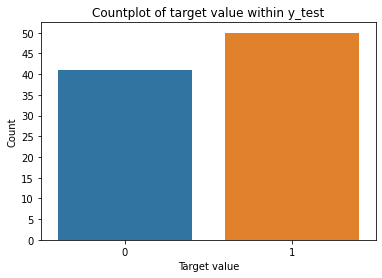

In [89]:
sns.countplot(x=y_test)
plt.title('Countplot of target value within y_test')
plt.ylabel('Count')
plt.xlabel('Target value')
plt.yticks([i for i in range(0,55,5)])
plt.show()

In [90]:

conf_matrix = confusion_matrix(y_test, y_predicted)


In [91]:
conf_matrix

array([[29, 12],
       [ 5, 45]])

In [92]:
df_confMatrix = pd.DataFrame(conf_matrix, index = ['Actual 0','Actual 1'], columns=['Predicted 0','Predicted 1'])

<AxesSubplot:>

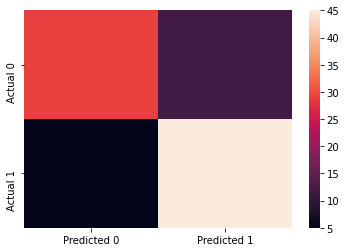

In [93]:
sns.heatmap(df_confMatrix)

In [97]:
model.score(X_train, y_train)

0.8537735849056604

In [98]:
model.score(X_test, y_test)

0.8131868131868132

In [99]:
pd.crosstab(y_test, y_predicted, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,29,12,41
1,5,45,50
All,34,57,91


In [ ]:
# Actual 1 predicted 1 = 45 -----> True Positive (TP)
# Actual 0 predicted 0 = 29 -----> True Negative (TN)

# these two together forms accurate results 

# Hence accuracy = (TP + TN) / Number of occurence 

# lets calculate it manually 

In [101]:
(45 + 29 ) / 91


0.8131868131868132

In [102]:
accuracy_score(y_test, y_predicted)

0.8131868131868132

In [ ]:
# Acutal 0 but predicted as 1 = 12 ------> False Positive (FP) , also called Type 1 error 
# If you understand - this is still ok to have , 
# yes it puts an unnecessary case load , based on symptomatic treatment you can still address this category

In [ ]:
# Actual 1 but predicted as 0 = 5 -------> False Negative (FN) , also called Type 2 error
# If you understand - this is extremely dangeroud , patient is actually sick but test declares him/her as not sick

In [104]:
# prevalance -- actual positive / total cases in sample

In [105]:
prevalance_score = 50/91 

In [106]:
prevalance_score

0.5494505494505495

In [ ]:
# Precision score - when it predicts 1 how often its correct as in actually 1

In [107]:
precision_score = 45 / 57

In [108]:
precision_score

0.7894736842105263

In [109]:
# so we say the test has 78% precision

In [110]:
#So the model has 81% accuracy with 78% precision

In [ ]:
# Accuracy is often not the best metrics for determining whether a model is good

In [ ]:
# we use a parameter called RECALL, TRUE POSITIVE RATE OR SENSIVITY 
#
# When it's actually yes, how often does it predict yes? 
#
# When does it is actually yes ---> TP and FN 
# 
# When it predicts yes         ----> TP
# so  RECALL, TRUE POSITIVE RATE OR SENSIVITY  = TP / (TP + FN)

In [111]:
from sklearn.metrics import recall_score

In [112]:
recall_score(y_test, y_predicted)

0.9

In [ ]:
# It means 9 out of 10 times actual YES is predicted as YES by the model

In [113]:
# lets calculate it manually


In [114]:
pd.crosstab(y_test, y_predicted, rownames = ['Actual'], colnames =['Predicted'], margins = True)

Predicted,0,1,All
Actual,,,
0,29,12,41
1,5,45,50
All,34,57,91


In [116]:
#TP = 45
#FN = 5
#Actually 1 = 45 + 5 = 50
#Predicted 1 = 45
print(f"Recall = {45/50}")

Recall = 0.9
